In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Champo = pd.read_csv("Champo Carpets V1.csv", encoding = 'UTF-8')

In [5]:
print("Shape: ",Champo.shape)
Champo.info()
# print(Champo.head(5))

Shape:  (13135, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderiD           13135 non-null  int64  
 1   Item_Id           13135 non-null  int64  
 2   CustomerCode      13135 non-null  object 
 3   CountryName       13135 non-null  object 
 4   customer_country  13135 non-null  object 
 5   QtyRequired       13135 non-null  int64  
 6   TotalArea         13135 non-null  float64
 7   Amount            13135 non-null  float64
 8   ITEM_NAME         13135 non-null  object 
 9   QualityName       13135 non-null  object 
 10  DesignName        13135 non-null  object 
 11  ColorName         13135 non-null  object 
 12  ShapeName         13135 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.3+ MB


In [6]:
Champo.isnull().sum()

OrderiD             0
Item_Id             0
CustomerCode        0
CountryName         0
customer_country    0
QtyRequired         0
TotalArea           0
Amount              0
ITEM_NAME           0
QualityName         0
DesignName          0
ColorName           0
ShapeName           0
dtype: int64

Orders registered from 14 different countries.


<Axes: title={'center': 'Top 5 Countries with Highest Orders'}, xlabel='Countries', ylabel='Number of Orders'>

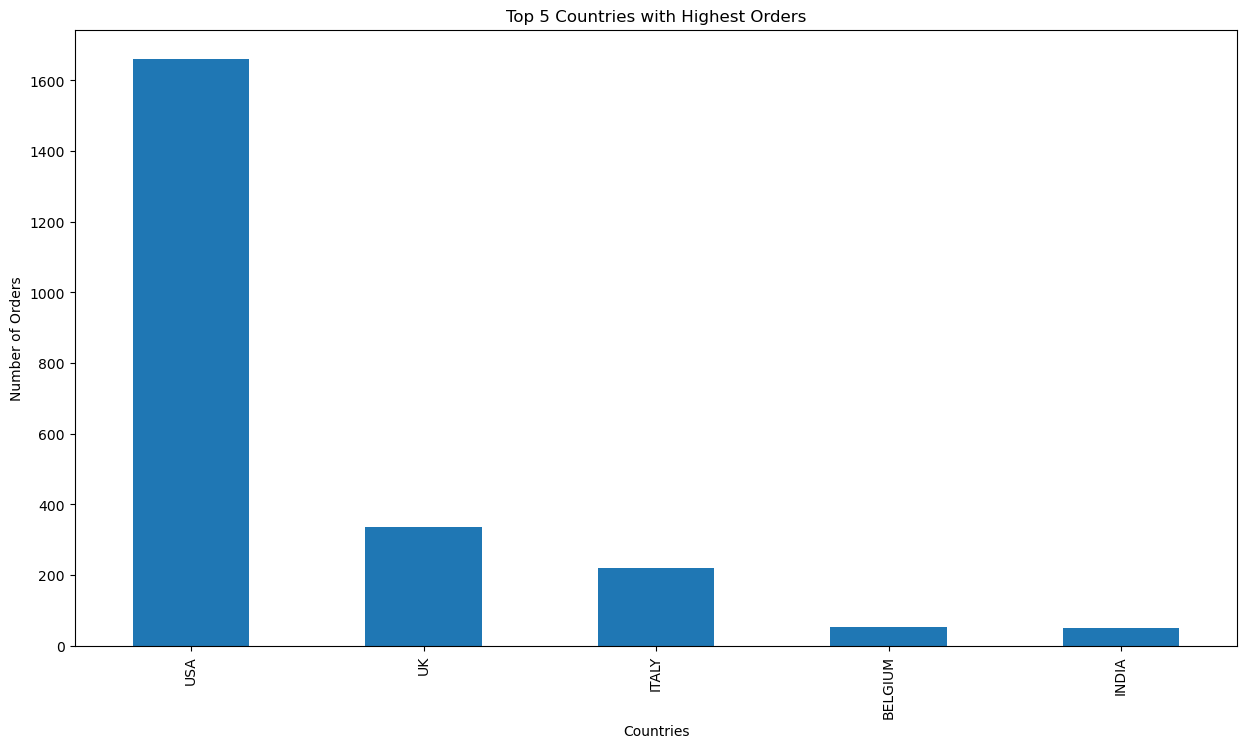

In [8]:
Order_Country = Champo.groupby(['OrderiD','CountryName']).count().reset_index()
Order_Country = Order_Country['CountryName'].value_counts()

print('Orders registered from', Order_Country.count(), 'different countries.')
Order_Country[0:5].plot(kind='bar', 
                              figsize=(15,8), use_index=True,
                              title='Top 5 Countries with Highest Orders',
                              xlabel= 'Countries', ylabel = 'Number of Orders')

Order registered from 45 different customers


<Axes: title={'center': 'Top 5 Customers with Highest Orders'}, xlabel='Number of Orders', ylabel='Customer Code'>

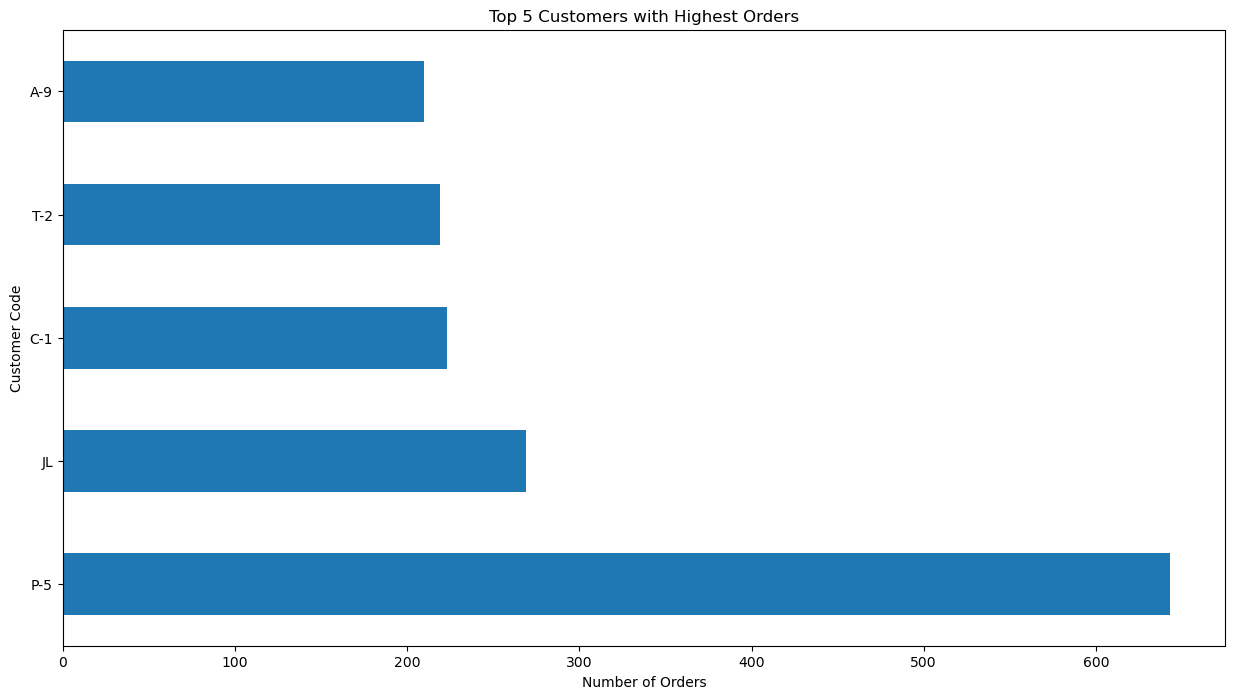

In [9]:
cntry_cust_freq = Champo.groupby(['OrderiD','CountryName','CustomerCode']).count().reset_index()
cust_freq = cntry_cust_freq.CustomerCode.value_counts()
print('Order registered from', cust_freq.count(),'different customers')
cust_freq[0:5].plot(kind='barh', figsize=(15,8),
                    use_index=True,
                    title='Top 5 Customers with Highest Orders',
                    xlabel= 'Number of Orders', ylabel = 'Customer Code')

<Axes: title={'center': 'Top 5 Items by Orders'}, xlabel='Item Name', ylabel='Total Number of Order'>

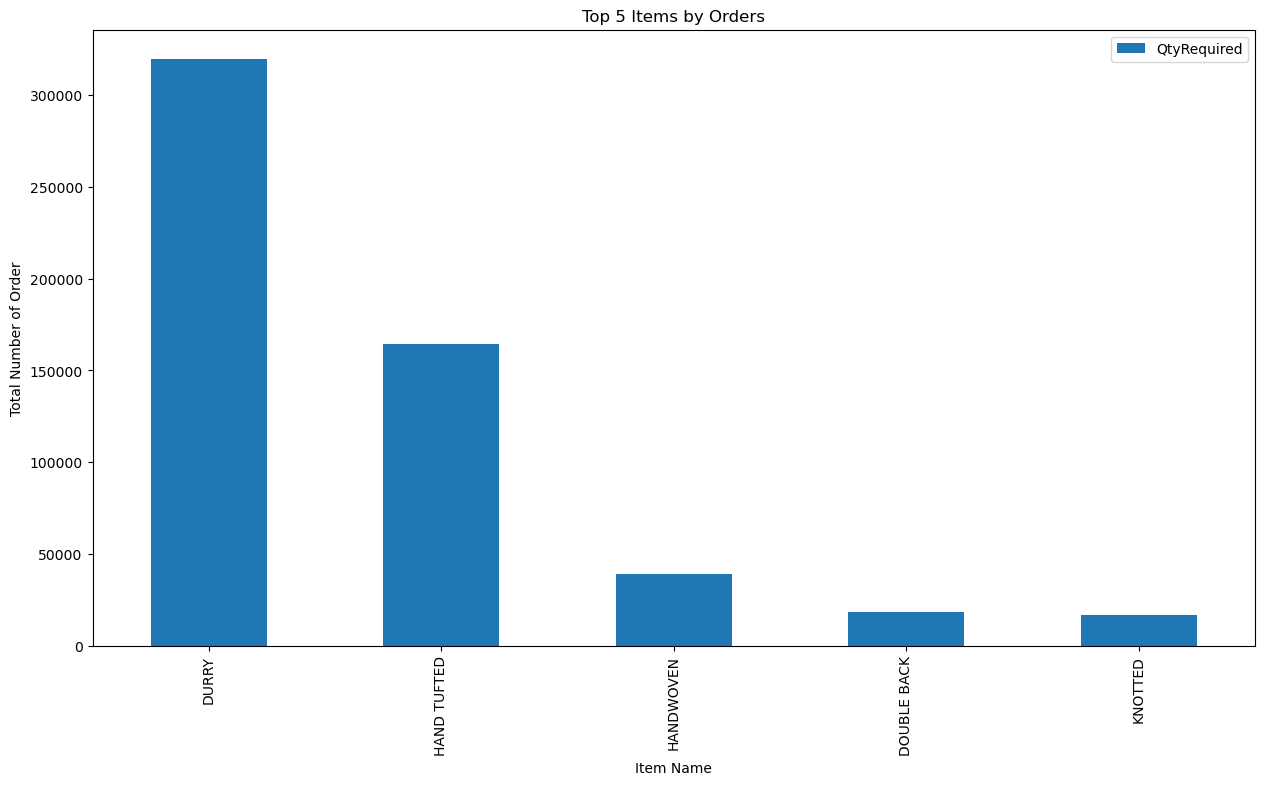

In [10]:
item_count = Champo.groupby(['ITEM_NAME'])['QtyRequired'].sum().reset_index()
item_count = item_count.sort_values('QtyRequired', ascending=False)
item_count[0:5].plot(kind='bar', x='ITEM_NAME', y='QtyRequired', figsize=(15,8),
                     title='Top 5 Items by Orders', xlabel='Item Name', ylabel='Total Number of Order')

<Axes: title={'center': 'Top 5 Items by Revenue'}, xlabel='Item Name', ylabel='Total sales value (in millions of $)'>

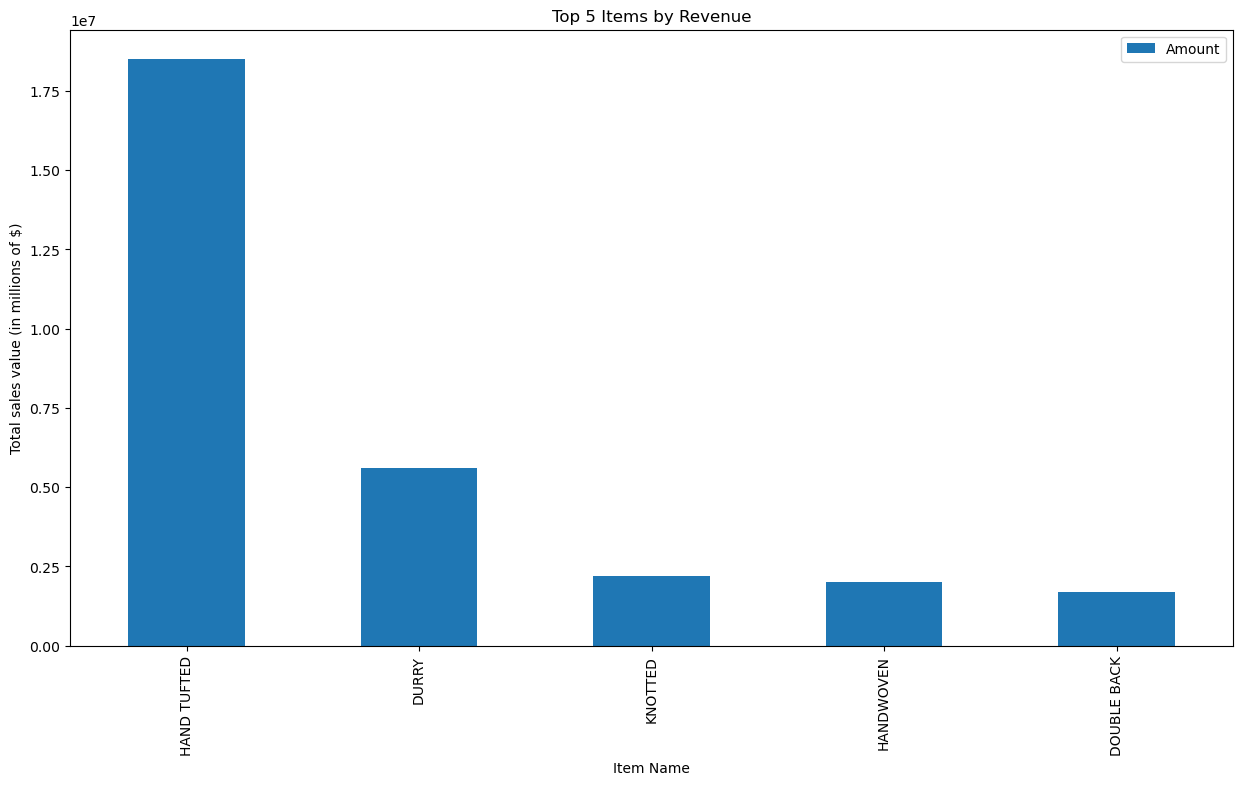

In [11]:
item_rev = Champo.groupby(['ITEM_NAME'])['Amount'].sum().reset_index()
item_rev = item_rev.sort_values('Amount', ascending=False)
item_rev[0:5].plot(kind='bar', x='ITEM_NAME', y='Amount', figsize=(15,8),
                     title='Top 5 Items by Revenue', 
                     xlabel='Item Name', ylabel="Total sales value (in millions of $)")

<Axes: title={'center': 'Carpet Shapes as per preference'}, xlabel='Carpet Shape', ylabel='Total Count of carpets sold'>

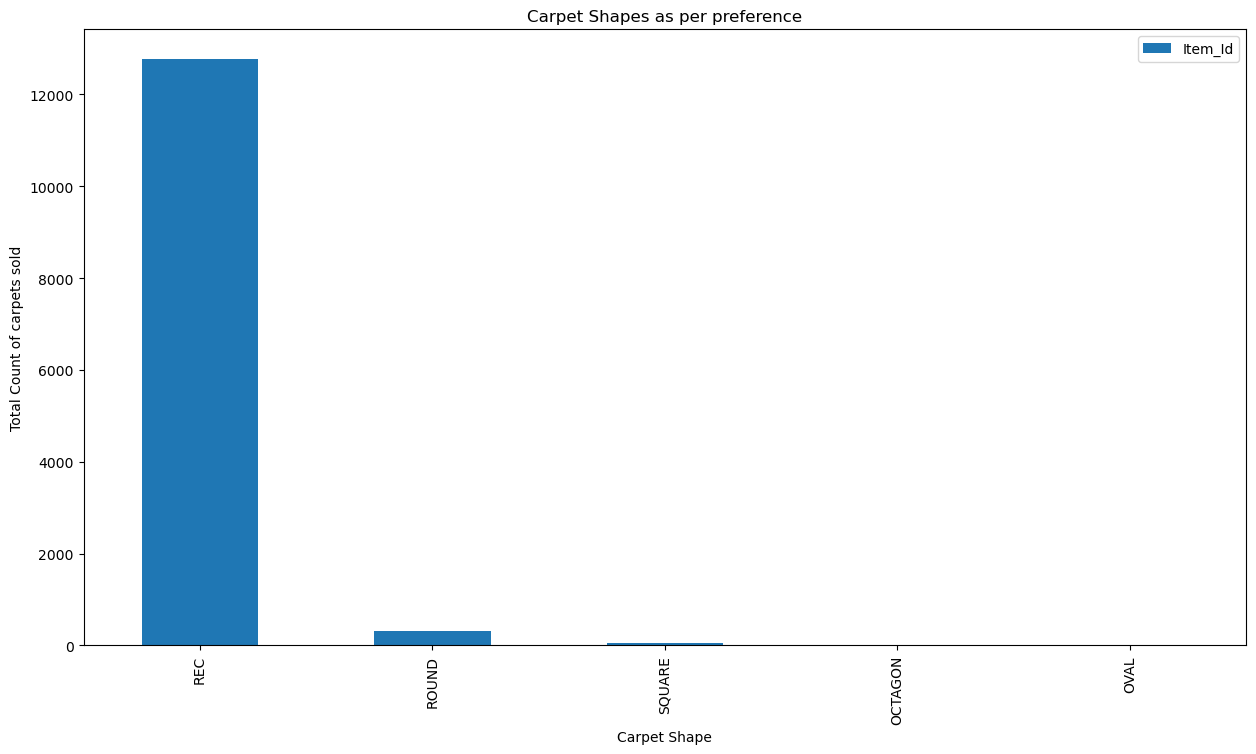

In [12]:
item_shape = Champo.groupby(['ShapeName'])['Item_Id'].count().reset_index()
item_shape = item_shape.sort_values('Item_Id', ascending=False)
item_shape[0:5].plot(kind='bar', x='ShapeName', y='Item_Id', figsize=(15,8),
                     title='Carpet Shapes as per preference', xlabel='Carpet Shape', ylabel="Total Count of carpets sold")

<Axes: title={'center': 'Top 5 Carpet Colors preferred'}, xlabel='Carpet Color', ylabel='Count of carpets sold'>

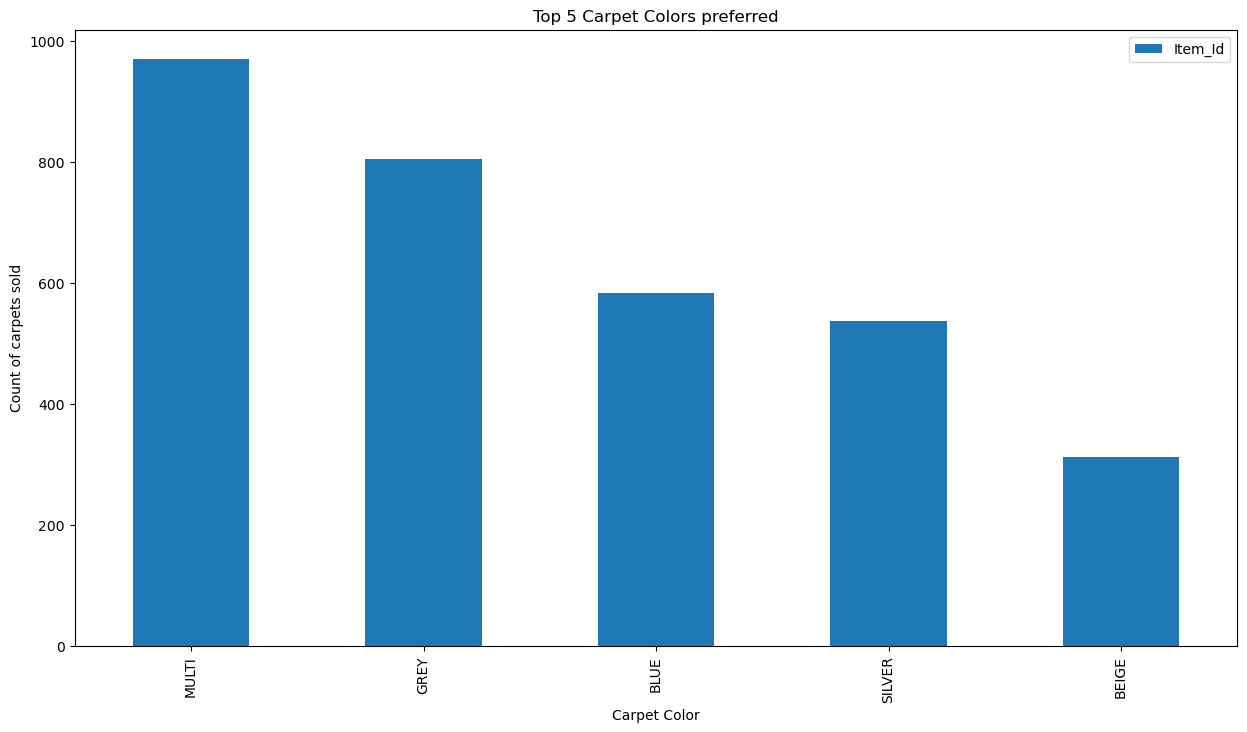

In [13]:
item_color = Champo.groupby(['ColorName'])['Item_Id'].count().reset_index()
item_color = item_color.sort_values('Item_Id', ascending=False)
item_color[0:5].plot(kind='bar', x='ColorName', y='Item_Id', figsize=(15,8),
                     title='Top 5 Carpet Colors preferred', xlabel='Carpet Color', ylabel="Count of carpets sold")

,CountryName,CustomerCode,Amount
0,AUSTRALIA,DR,28648.116500
1,AUSTRALIA,RC,328290.747500
2,BELGIUM,L-2,21503.495000
3,BELGIUM,PD,404528.945484
4,BELGIUM,T-9,758.970000


In [25]:
cust_order_cnt = Champo.groupby(['CustomerCode'])['OrderiD'].count().reset_index()
cust_order_cnt[0:5]
cust_amt_sum = Champo.groupby(['CustomerCode'])['Amount'].sum().reset_index()
cust_amt_sum[0:5]

,CustomerCode,Amount
0,A-11,1.854041e+05
1,A-6,6.247460e+03
2,A-9,1.592080e+06
3,B-2,1.481116e+04
4,B-3,5.862686e+04


In [27]:
cust_df = cust_order_cnt.merge(cust_amt_sum, on = 'CustomerCode')
cust_df[0:5]

,CustomerCode,OrderiD,Amount
0,A-11,40,1.854041e+05
1,A-6,25,6.247460e+03
2,A-9,1173,1.592080e+06
3,B-2,47,1.481116e+04
4,B-3,72,5.862686e+04
